In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,classification_report
import os
import datetime

In [2]:
from utils import preprocess_data

In [3]:
#load pickled xgboost model
file_name = 'xgb_classifier_from_greedsearch.pkl'

xgb_model = pickle.load(open(file_name, 'rb'))

In [4]:
x = datetime.datetime.now()

version_stamp= x.strftime("%B-%d")

dataset_name = f'customer_data_augmented{version_stamp}.csv'

file_path = os.path.join(os.path.abspath(os.curdir), 'lab_2_artifacts', dataset_name)

df = pd.read_csv(file_path)

In [5]:
X_train, X_test, y_train, y_test = preprocess_data(df)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((908, 11), (227, 11), (908, 1), (227, 1))

In [7]:
predicted = xgb_model.predict(X_test)
probs_predict = xgb_model.predict_proba(X_test)[:,1]

accuracy = accuracy_score(y_test, predicted)
auc = roc_auc_score(y_test, probs_predict)

print('Accuracy: %.2f%%' % (accuracy * 100.0))
print('AUC: %.2f%%' % (auc * 100.0))

Accuracy: 79.74%
AUC: 65.46%


In [8]:
#Plot the ROC curve
confusion_matrix = confusion_matrix(y_test, predicted)

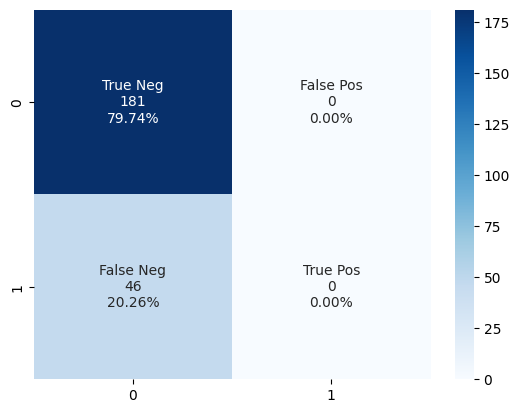

In [9]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

 #computing variables for specific confusion matrix
group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Blues')
plt.savefig('lab_2_artifacts/confusion_matrix.png')


In [10]:
print(xgb_model.feature_importances_)

[0.         0.         0.         0.68338    0.         0.
 0.         0.31661996 0.         0.         0.        ]


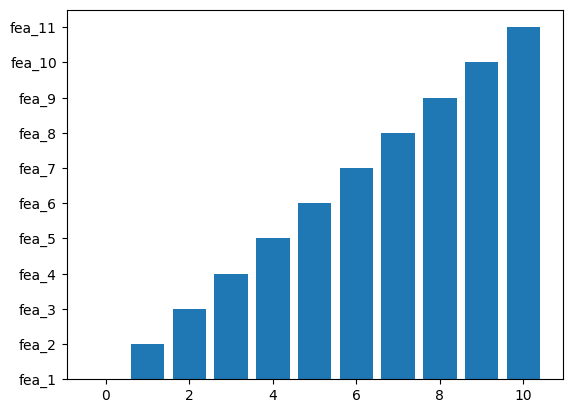

In [11]:
plt.bar(range(len(xgb_model.feature_importances_)), df.columns[2:])
plt.savefig('lab_2_artifacts/feature_importance.png')
plt.show()
